# UTP PPM 2024

---



# Naive Bayes Classifier

Tuliskan Nama, NIM, dan kelas Anda:

Nama  : Ahmad Zaki

NIM   : 225150201111025

Kelas : PPM-D

# Data Loading dan Data Inspection

## Data Loading

In [239]:
from google.colab import files

files.upload()

Saving churn_cleaned.csv to churn_cleaned (3).csv


{'churn_cleaned (3).csv': b'gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn\nFemale,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No\nMale,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No\nMale,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes\nMale,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No\nFemale,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes\nFemale,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes\nMale,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (a

In [240]:
# Baca data menggunakan Pandas

import pandas as pd

df = pd.read_csv('churn_cleaned.csv')

## Data Inspection

In [241]:
df.iloc[:10, :-10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes
1,Male,0,No,No,34,Yes,No,DSL,Yes,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes


In [242]:
df.iloc[:10, 10:]

,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


No: Skewness=-0.03, Kurtosis=-1.41
Yes: Skewness=1.15, Kurtosis=0.20


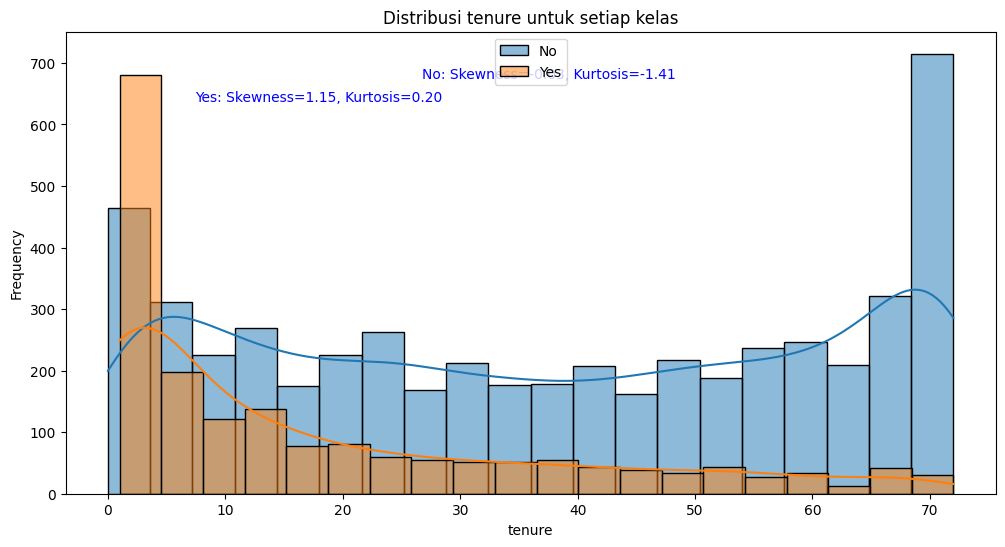

No: Skewness=-0.03, Kurtosis=-1.36
Yes: Skewness=-0.73, Kurtosis=-0.36


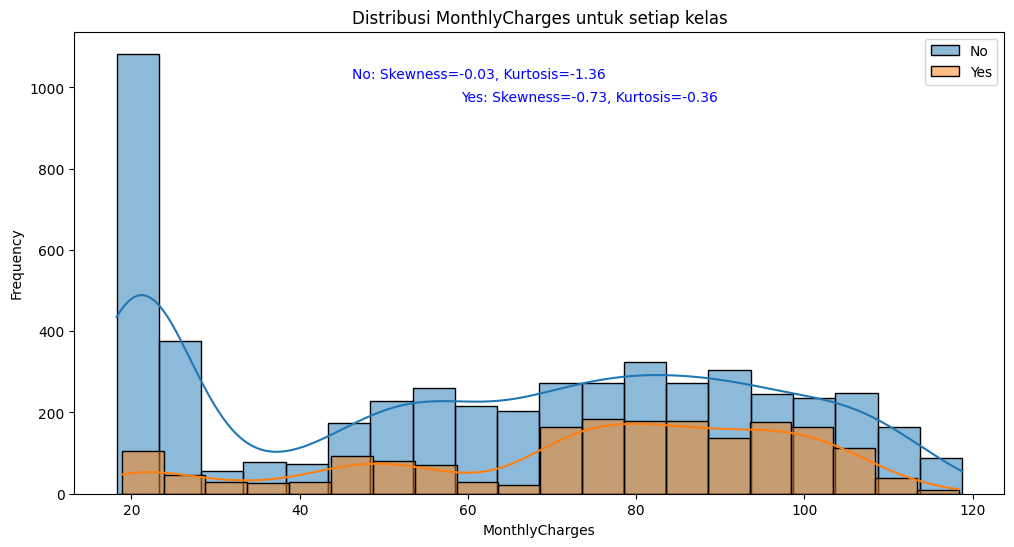

In [244]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_distribusi(dataframe, column_list, class_column):
    for column in column_list:
        plt.figure(figsize=(12, 6))
        for cls in dataframe[class_column].unique():
            sns.histplot(dataframe[dataframe[class_column]==cls][column], bins=20, alpha=0.5, kde=True, label=cls)
        plt.title(f'Distribusi {column} untuk setiap kelas')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.legend()

        # nilai skewness dan kurtosis
        ypos = plt.ylim()[1] * 0.9
        ystep = plt.ylim()[1] * 0.05
        for cls in dataframe[class_column].unique():
            skew = dataframe[dataframe[class_column]==cls][column].skew()
            kurt = dataframe[dataframe[class_column]==cls][column].kurtosis()
            plt.text(dataframe[dataframe[class_column]==cls][column].mean(),
                     ypos,
                     f'{cls}: Skewness={skew:.2f}, Kurtosis={kurt:.2f}',
                     ha='center', fontsize=10, color='blue')
            print(f'{cls}: Skewness={skew:.2f}, Kurtosis={kurt:.2f}')
            ypos -= ystep

        plt.show()

plot_distribusi(df, ['tenure', 'MonthlyCharges'], 'Churn')

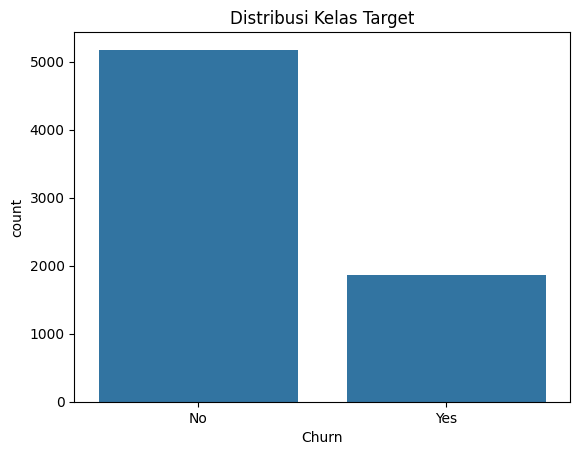

In [245]:
# Cek distribusi target kelas

sns.countplot(x='Churn', data=df)
plt.title('Distribusi Kelas Target')
plt.show()

# Imbalance Handling

Jika dirasa perlu, lakukan imbalance handling menggunakan metode Oversampling, Undersampling, SMOTE, ataupun metode lainnya untuk meratakan distribusi target kelas



In [246]:
from imblearn.over_sampling import SMOTENC, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# oversampling dengan
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(df[['MonthlyCharges', 'tenure']], df['Churn'])

# undersampling
undersample = RandomUnderSampler(sampling_strategy='majority')
X_under, y_under = undersample.fit_resample(df[['MonthlyCharges', 'tenure']], df['Churn'])

print(pd.Series(y_over).value_counts())
print(pd.Series(y_under).value_counts())

Churn
No     5174
Yes    5174
Name: count, dtype: int64
Churn
No     1869
Yes    1869
Name: count, dtype: int64


In [247]:
df_over = pd.DataFrame(X_over, columns=['MonthlyCharges', 'tenure'])
df_over['Churn'] = y_over

df_under = pd.DataFrame(X_under, columns=['MonthlyCharges', 'tenure'])
df_under['Churn'] = y_under

# gabung hasil oversampling dan undersampling
df_combined = pd.concat([df_over, df_under], ignore_index=True)
print(df_combined['Churn'].value_counts())

Churn
No     7043
Yes    7043
Name: count, dtype: int64


# Pemrosesan Awal Data Kontinu

## Standard Scaling

In [248]:
def standarisasi(df):
  std_df = df.copy()  # copy untuk mencegah modifikasi inplace

  for column in std_df.select_dtypes(include=['int64', 'float64']).columns:
    mean = std_df[column].mean()
    std = std_df[column].std()

    std_df[column] = (std_df[column] - mean) / std
  return std_df

std_df = standarisasi(df_combined)

## Normalization

In [249]:
def normalisasi(df):
  norm_df = df.copy()
  for column in norm_df.select_dtypes(include=['int64', 'float64']).columns:
    # cari minimum dan maksimum
    min_val = norm_df[column].min()
    max_val = norm_df[column].max()

    norm_df[column] = (norm_df[column] - min_val) / (max_val - min_val)
  return norm_df

norm_df = normalisasi(df_combined)

# Modeling

Pemodelan dilakukan dengan penggabungan konsep Gaussian Naive Bayes dengan Multinomial Naive Bayes. Tidak diperbolehkan untuk melakukan rekayasa fitur dengan binning.

## Splitting Dataset

In [250]:
from sklearn.model_selection import train_test_split

data_latih, data_uji = train_test_split(df_combined, test_size=0.3, random_state=101)

norm_data_latih, norm_data_uji = data_latih.copy(), data_uji.copy()
norm_label_uji = norm_data_uji.pop('Churn')

std_data_latih, std_data_uji = data_latih.copy(), data_uji.copy()
std_label_uji = std_data_uji.pop('Churn')

## Perhitungan Prior

In [251]:
from collections import Counter

def hitung_prior(list_kelas):
  n_data = len(list_kelas)
  prior = Counter(list_kelas)
  for key in prior.keys():
    prior[key] = prior[key] / n_data
  return prior

## Menghitungan likelihood gaussian dan multinomial

In [252]:
def hitung_mean_std_kelas(input_data):
    list_columns = input_data.columns[:-1]
    class_column_name = input_data.columns[-1]
    list_class = set(input_data[class_column_name])
    rata2 = {}
    std = {}
    for column in list_columns:
        for a_class in list_class:
            data_kelas = input_data.loc[input_data[class_column_name] == a_class][column]
            rata2[(a_class, column)] = data_kelas.mean()
            std[(a_class, column)] = data_kelas.std()
    return rata2, std

def likelihood_gaussian(input_data):
    rata2, std = hitung_mean_std_kelas(input_data)
    likelihood = {}
    for class_column, column_mean_std in rata2.items():
        class_value, column_name = class_column
        mean = column_mean_std
        stdev = std[class_column]
        likelihood[class_column] = (mean, stdev)
    return likelihood

def likelihood_multinomial(input_data):
    rata2, std = hitung_mean_std_kelas(input_data)
    likelihood = {}
    for class_column, column_mean_std in rata2.items():
        class_value, column_name = class_column
        mean = column_mean_std
        p = 1 / (np.sqrt(2 * np.pi) * std[class_column])
        likelihood[class_column] = p
    return likelihood

## Training Naive Bayes

In [253]:
def training_naive_bayes(data_latih):
    prior = hitung_prior(data_latih.iloc[:, -1])
    likelihood_gaussian_dict = likelihood_gaussian(data_latih)
    likelihood_multinomial_dict = likelihood_multinomial(data_latih)

    model = {'prior': prior,
             'likelihood_gaussian': likelihood_gaussian_dict,
             'likelihood_multinomial': likelihood_multinomial_dict,
             'list_class': set(data_latih.iloc[:, -1]),
             'list_columns': data_latih.columns[:-1]}

    return model

## Testing Naive Bayes

In [261]:
def testing_naive_bayes(model, data_uji):
    prior = model['prior']
    likelihood_gaussian_dict = model['likelihood_gaussian']
    likelihood_multinomial_dict = model['likelihood_multinomial']
    list_class = model['list_class']
    list_columns = model['list_columns']

    posterior = {a_class: 1 for a_class in list_class}
    for a_class in list_class:
        likelihood_gaussian_class = 1
        likelihood_multinomial_class = 1
        for column in list_columns:
            likelihood_gaussian_class *= likelihood_gaussian_dict[(a_class, column)][0]
            likelihood_multinomial_class *= likelihood_multinomial_dict[(a_class, column)]
        posterior[a_class] = likelihood_gaussian_class * likelihood_multinomial_class * prior[a_class]

    predicted_class = max(posterior, key=posterior.get)
    return predicted_class


# Analisis Klasifikasi

## Dataset Standarisasi

### Training Naive Bayes

In [262]:
model_std = training_naive_bayes(std_data_latih)

### Evaluasi Prediksi

In [263]:
prediksi_total_std =[]
for indeks in range(std_data_uji.shape[0]):
  prediksi_total_std.append(testing_naive_bayes(model_std,std_data_uji.iloc[indeks]))
print("Total prediksi benar: ",sum(prediksi_total_std==std_label_uji))

Total prediksi benar:  2133


## Dataset Normalisasi

### Training Naive Bayes

In [264]:
model_norm = training_naive_bayes(norm_data_latih)

### Evaluasi Prediksi

In [267]:
prediksi_total_norm =[]
for indeks in range(norm_data_uji.shape[0]):
  prediksi_total_norm.append(testing_naive_bayes(model_norm, norm_data_uji.iloc[indeks]))
print("Total prediksi benar: ",sum(prediksi_total_norm==norm_label_uji))

Total prediksi benar:  2133


# Kesimpulan

Soal

1. Apakah data kontinu dalam dataset menunjukkan kecenderungan distribusi normal?

2. Jika anda melakukan imbalance handling, mengapa hal tersebut perlu dilakukan?

3. Dalam hasil percobaan diatas, apakah efek dari standarisasi/normalisasi yang dilakukan terhadap data?

4. Dalam kasus yang diberikan, apakah model hybrid multinomial dan gaussian sudah optimal? Pengembangan apa saja yang dapat dilakukan?

Jawaban

1. Data monthlycharges menunjukkan kecenderungan distribusi normal yang lebih kuat dibandingkan tenure, meskipun masih terdapat deviasi.

2. Karena untuk mencegah bias model, meningkatkan performa klasifikasi kelas minoritas, mengurangi risiko kesalahan prediksi pada kelas minoritas, dan memastikan interpretasi model yang lebih akurat dan adil apalagi pada dataset yang diberikan menunjukkan distribusi target kelas (Churn) yang sangat tidak merata, dimana "No" adalah dua kali lipat dan lebih dari "Yes"

3. Efek dari standarisasi atau normalisasi terhadap data adalah mengubah skala nilai fitur-fitur dalam dataset sehingga memiliki mean 0 dan varians 1 (standarisasi) atau rentang nilai antara 0 dan 1 (normalisasi). Hal ini membantu dalam meningkatkan performa dan stabilitas model machine learning, terutama ketika algoritma-algoritma tersebut sensitif terhadap skala fitur. Dengan melakukan standarisasi atau normalisasi, dapat dipastikn bahwa setiap fitur memiliki kontribusi yang seimbang dalam pembentukan model, sehingga mencegah dominasi fitur dengan skala yang besar terhadap fitur dengan skala yang lebih kecil dalam proses traning.

4. Dalam kasus yang diberikan,  model hybrid multinomial dan Gaussian belum menjadikan model tersebut optimal terlihat dalam hasil prediksi yang akurasi nya sekitar 50%. Pengembangan yang dapat dilakukan termasuk peningkatan dalam pemodelan likelihood untuk mengakomodasi distribusi yang lebih kompleks, seperti menggunakan distribusi probabilitas yang lebih adaptif untuk setiap fitur atau menggabungkan model Naive Bayes dengan algoritma pembelajaran lain yang lebih canggih. Selain itu, penting untuk melakukan evaluasi lebih lanjut terhadap performa model dengan cross validation dan hyperparameter optimization untuk memastikan bahwa model yang dihasilkan memberikan hasil yang optimal.